In [4]:
import os
import numpy as np
# import numpy as np
import random
train_list=set(range(1,836))
val=set(random.sample(range(1,836),int(836/5)))
train_list=list(train_list-val)
val=list(val)

In [7]:
out=open("C:\\Users\\Administrator\\Desktop\\数学建模\\train_list.csv","w")
for i in range(len(train_list)):
    out.write(str(train_list[i])+'\n')

In [9]:
out=open("C:\\Users\\Administrator\\Desktop\\数学建模\\val_list.csv","w")
for i in range(len(val)):
    out.write(str(val[i])+'\n')

In [10]:
import numpy as np
data=np.genfromtxt("C:\\Users\\Administrator\\Desktop\\数学建模\\项目一汇总.csv",dtype=float,delimiter=',')
train_data=np.zeros((668,13))
val_data=np.zeros((167,13))
for i in range(len(train_list)):
    train_data[i]=(data[train_list[i]-1,3:])
for i in range(len(val)):
    val_data[i]=(data[val[i]-1,3:])

In [12]:
import numpy as np
luwang_data=np.genfromtxt("C:\\Users\\Administrator\\Desktop\\数学建模\\luwang",dtype=float,delimiter=',')

In [15]:
print (len(luwang_data))

835


In [16]:
print(luwang_data[1])

0.0999228395062


In [18]:
luwang_train=np.zeros((668,1))
luwang_val=np.zeros((167,1))

In [19]:
for i in range(len(train_list)):
    luwang_train[i][0]=(luwang_data[train_list[i]-1])
for i in range(len(val)):
    luwang_val[i][0]=(luwang_data[val[i]-1])

In [23]:
luwang_train=normalize(luwang_train[:,0])
luwang_val=normalize(luwang_val[:,0])

In [24]:
print (luwang_train[1])

0.354820706013


In [25]:
luwang_train=np.reshape(luwang_train,[668,1])
luwang_val=np.reshape(luwang_val,[167,1])

In [11]:
print (train_data[0])

[ -4.82969501e+01  -1.96367664e+00   6.60000000e+01   3.96460000e-02
   1.68036000e-01   6.91500000e+01   2.86048000e+01   1.39007000e+03
   1.00000000e+00   6.62346000e+01   3.02099000e+01   3.14217000e+01
   0.00000000e+00]


In [27]:
all_data_train=np.concatenate([luwang_train,train_data],axis=1)
all_data_val=np.concatenate([luwang_val,val_data],axis=1)

In [30]:
print (all_data_train.shape)
print(all_data_train[2][-1])

(668, 14)
1.0


In [31]:
from sklearn import svm
all_train_data_x=all_data_train[:,:13]
all_train_data_label=all_data_train[:,-1]
clf = svm.SVC()
clf.fit(all_train_data_x,all_train_data_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
all_data=np.concatenate([all_data_train,all_data_val],axis=0)
print (np.shape(all_data))

(835, 14)


In [32]:
all_val_data_x=all_data_val[:,:13]
all_val_data_label=all_data_val[:,-1]
predict=clf.predict(all_val_data_x)
ratio=np.sum(np.abs(predict-all_val_data_label))/167.0
print(1-ratio)

0.700598802395


In [68]:
first=all_data[:,:7]
second=all_data[:,10:]
select=np.concatenate([first,second],axis=1)
print(select[2][-1])
print(select[2,:])

1.0
[ 0.56578764  0.0602578   0.70369339  0.025       0.02017761  0.20521994
  0.28971963  0.59036791  0.09820728  0.19614345  1.        ]


In [69]:
price=select[:,3]

In [70]:
havedone=select[:,-1]

In [71]:
print (select[1,:])

[ 0.35482071  0.1394752   0.69448368  0.025       0.1685198   0.05148237
  0.1728972   0.48132913  0.1670835   0.09420245  0.        ]


In [72]:
the_feature=np.delete(select,3,1)

In [73]:
print(the_feature[1,:])

[ 0.35482071  0.1394752   0.69448368  0.1685198   0.05148237  0.1728972
  0.48132913  0.1670835   0.09420245  0.        ]


In [74]:
the_feature=np.delete(the_feature,-1,1)

In [75]:
price=np.reshape(price,[len(price),1])
havedone=np.reshape(havedone,[len(price),1])

In [76]:
data=np.concatenate([the_feature,price],axis=1)
svm_data=np.concatenate([the_feature,price,havedone],axis=1)

In [77]:
print(data[1,:])

[ 0.35482071  0.1394752   0.69448368  0.1685198   0.05148237  0.1728972
  0.48132913  0.1670835   0.09420245  0.025     ]


In [78]:
print(svm_data[1,:])

[ 0.35482071  0.1394752   0.69448368  0.1685198   0.05148237  0.1728972
  0.48132913  0.1670835   0.09420245  0.025       0.        ]


In [79]:
data=np.float64(data)
svm_data=np.float64(svm_data)

In [80]:
print(np.shape(data))

(835, 10)


In [81]:
def write_file(name,data,m,n):
    out=open(name,"w")
    for i in range(m):
        for j in range(n-1):
            out.write(str(data[i][j])+',')
        out.write(str(data[i][-1])+'\n')
    out.close()

In [82]:
write_file("C:\\Users\\Administrator\\Desktop\\数学建模\\b-1-data.csv",data,835,10)
write_file("C:\\Users\\Administrator\\Desktop\\数学建模\\b-1-svm.csv",svm_data,835,11)

In [54]:
with open("C:\\Users\\Administrator\\Desktop\\数学建模\\b-1-data.csv","w") as foo:
    np.savetxt(foo,data,fmt='%.8f',delimiter=',')
with open("C:\\Users\\Administrator\\Desktop\\数学建模\\b-1-svm.csv","w") as foo:
    np.savetxt(foo,svm_data,fmt='%.8f',delimiter=',')

TypeError: Mismatch between array dtype ('float32') and format specifier ('%.8f,%.8f,%.8f,%.8f,%.8f,%.8f,%.8f,%.8f,%.8f,%.8f')

In [44]:
print(the_feature[1,:])

[ 0.35482071  0.1394752   0.025       0.1685198   0.05148237  0.1728972
  0.48132913  0.1670835   0.09420245]


In [20]:
def normalize(x):
    min_x=np.min(x)
    max_x=np.max(x)
    for i in range(len(x)):
        x[i]=(x[i]-min_x)/(max_x-min_x)
    return x

In [21]:
print (train_data.shape)

(668, 13)


In [22]:
for i in range(12):
    train_data[:,i]=normalize(train_data[:,i])
    val_data[:,i]=normalize(val_data[:,i])

In [28]:
print (train_data[2])

[  6.02577977e-02   7.03693389e-01   2.50000000e-02   2.01776119e-02
   2.06075229e-01   2.79279279e-01   5.51206403e-03   6.24299341e-06
   1.00000000e+00   6.00159233e-01   9.82072792e-02   1.96143447e-01
   1.00000000e+00]


In [29]:
from sklearn import svm
train_data_x=train_data[:,1:13]
train_data_label=train_data[:,-1]
clf = svm.SVC()
clf.fit(train_data_x,train_data_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
val_data_x=val_data[:,1:12]
val_data_label=val_data[:,-1]
predict=clf.predict(val_data_x)
ratio=np.sum(np.abs(predict-val_data_label))/167.0
print(1-ratio)

In [34]:
print(1-ratio)

0.766467065868


In [35]:
from sklearn import svm
train_data_x=train_data[:,1:12]
train_data_label=train_data[:,-1]
clf = svm.LinearSVC()
clf.fit(train_data_x,train_data_label)
val_data_x=val_data[:,1:12]
val_data_label=val_data[:,-1]
predict=clf.predict(val_data_x)
ratio=np.sum(np.abs(predict-val_data_label))/167.0
print(1-ratio)

0.676646706587


In [36]:
from sklearn import svm
train_data_x=train_data[:,1:12]
train_data_label=train_data[:,-1]
clf = svm.NuSVC()
clf.fit(train_data_x,train_data_label)
val_data_x=val_data[:,1:12]
val_data_label=val_data[:,-1]
predict=clf.predict(val_data_x)
ratio=np.sum(np.abs(predict-val_data_label))/167.0
print(1-ratio)

0.724550898204


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from edward.models import Normal

ModuleNotFoundError: No module named 'tensorflow'

In [86]:
import pandas as pd
svm_head = pd.read_csv('C:\\Users\\Administrator\\Desktop\\数学建模\\svm-head.csv')

In [87]:
# from pandas.tools.plotting import andrews_curves
# 
# plt.figure()
# 
# andrews_curves(data, 'Name')
svm_head.head()

,lat,lng,road,user,task,ten,first,second,third,price,done
0,0.119939,0.052772,0.716751,0.021338,0.156988,0.373832,0.613592,0.084556,0.208631,0.050,0.0
1,0.354821,0.139475,0.694484,0.168520,0.051482,0.172897,0.481329,0.167084,0.094202,0.025,0.0
2,0.565788,0.060258,0.703693,0.020178,0.205220,0.289720,0.590368,0.098207,0.196143,0.025,1.0
3,0.231589,0.051699,0.862435,0.025670,0.034184,0.130841,0.798883,0.072495,0.322934,0.500,0.0
4,0.686842,0.047528,0.700116,0.019504,0.340247,0.144860,0.603330,0.090829,0.211728,0.025,0.0


In [97]:
svm_head.head()

,lat,lng,road,user,task,ten,first,second,third,price,done
0,0.119939,0.052772,0.716751,0.021338,0.156988,0.373832,0.613592,0.084556,0.208631,0.050,0.0
1,0.354821,0.139475,0.694484,0.168520,0.051482,0.172897,0.481329,0.167084,0.094202,0.025,0.0
2,0.565788,0.060258,0.703693,0.020178,0.205220,0.289720,0.590368,0.098207,0.196143,0.025,1.0
3,0.231589,0.051699,0.862435,0.025670,0.034184,0.130841,0.798883,0.072495,0.322934,0.500,0.0
4,0.686842,0.047528,0.700116,0.019504,0.340247,0.144860,0.603330,0.090829,0.211728,0.025,0.0


In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
# from pandas.tools.plotting import  andrews_curves
from pandas.plotting import  andrews_curves

andrews_curves(svm_head, 'done')
plt.figure()
plt.savefig("C:\\Users\\Administrator\\Desktop\\数学建模\\svm_multitional_visual.png")

In [99]:
plt.figure()

In [100]:
andrews_curves(svm_head, 'done')

In [ ]:
from pandas.plotting import parallel_coordinates

In [112]:
reset_data=np.genfromtxt("C:\\Users\\Administrator\\Desktop\\数学建模\\reset",dtype=float,delimiter=',')

In [113]:
print(reset_data[1,:])

[             nan   2.26862053e+01   1.13940525e+02  -3.49326960e+01
  -6.09441972e+00   4.34617000e-01   5.66943000e-02   6.70000000e+01
   3.95336000e+03   0.00000000e+00   1.31416000e+01   8.36162000e+01
   2.93505000e+01   9.00848770e-02   6.55000000e+01   0.00000000e+00]


In [114]:
reset_data=reset_data[:,3:]
print(np.shape(reset_data))

(835, 13)


In [109]:
print(reset_data[1,:])

[ -4.82969501e+01  -4.82969501e+01   3.74939000e-02   1.68036000e-01
   6.91500000e+01   2.86048000e+01   0.00000000e+00   1.18729000e+01
   9.51113000e+01   4.32941000e+01   2.43981480e-02   6.60000000e+01
   0.00000000e+00]


In [115]:
for i in range(13):
    reset_data[:,i]=normalize(reset_data[:,i])

In [116]:
print(reset_data[1,:])

[ 0.1394752   0.69448368  0.26157798  0.0525031   0.16666667  0.902989    0.
  0.08342591  0.60081124  0.23147686  0.33060495  0.025       0.        ]


In [118]:
write_file("C:\\Users\\Administrator\\Desktop\\数学建模\\reset-data.csv",reset_data[:,:12],835,12)
write_file("C:\\Users\\Administrator\\Desktop\\数学建模\\reset-svm.csv",reset_data,835,13)


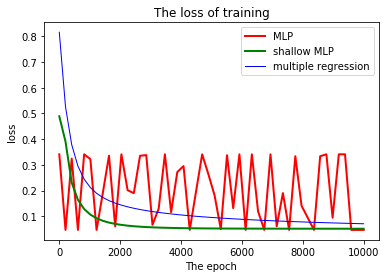

In [129]:
import numpy as np
loss_point=np.genfromtxt("/home/scs4450/PycharmProjects/数学建模/loss_point",dtype=float,delimiter=',')
loss_point1=np.genfromtxt("/home/scs4450/PycharmProjects/数学建模/loss_point1",dtype=float,delimiter=',')
loss_point2=np.genfromtxt("/home/scs4450/PycharmProjects/数学建模/loss_point2",dtype=float,delimiter=',')
x_data=np.linspace(0,50,num=50)
loss_point/=835.0
x_data*=200
plt.plot(x_data,loss_point,label="MLP",color="red",linewidth=2)
plt.plot(x_data,loss_point1,label="shallow MLP",color="green",linewidth=2)
plt.plot(x_data,loss_point2,label="multiple regression",color="blue",linewidth=1)
plt.xlabel("The epoch")
plt.ylabel("loss")
plt.title("The loss of training")
plt.legend()  
plt.savefig("loss.png")

plt.show()

In [ ]:
from sklearn import svm
all_train_data_x=all_data_train[:,:13]
all_train_data_label=all_data_train[:,-1]
clf = svm.SVC()
clf.fit(all_train_data_x,all_train_data_label)